**CSE 464 - Case Study 1**

---
Mahny Barazandehtar - 20210702004



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Tetuan-City-power-consumption.csv')

# Convert DateTime to datetime object for time-series analysis
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Set DateTime as index
data.set_index('DateTime', inplace=True)

# Resample to daily averages for better trend visibility
daily_data = data.resample('D').mean()

data.head()


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data.dtypes

,0
Temperature,float64
Humidity,float64
Wind Speed,float64
general diffuse flows,float64
diffuse flows,float64
Zone 1 Power Consumption,float64
Zone 2 Power Consumption,float64
Zone 3 Power Consumption,float64


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


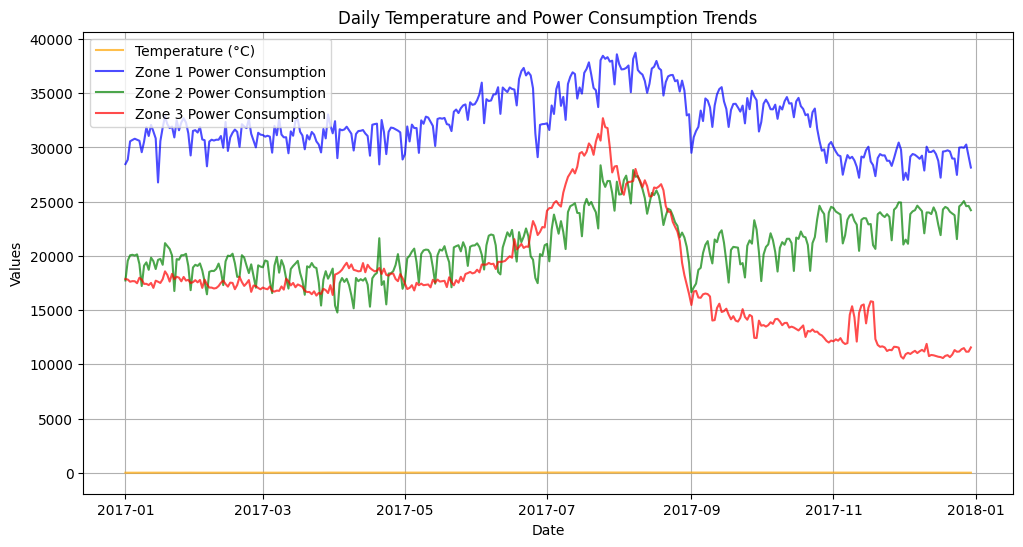

In [ ]:
# Temperature vs Power Consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Temperature'], label='Temperature (°C)', color='orange', alpha=0.7)
plt.plot(daily_data['Zone 1 Power Consumption'], label='Zone 1 Power Consumption', color='blue', alpha=0.7)
plt.plot(daily_data['Zone 2  Power Consumption'], label='Zone 2 Power Consumption', color='green', alpha=0.7)
plt.plot(daily_data['Zone 3  Power Consumption'], label='Zone 3 Power Consumption', color='red', alpha=0.7)
plt.title('Daily Temperature and Power Consumption Trends')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

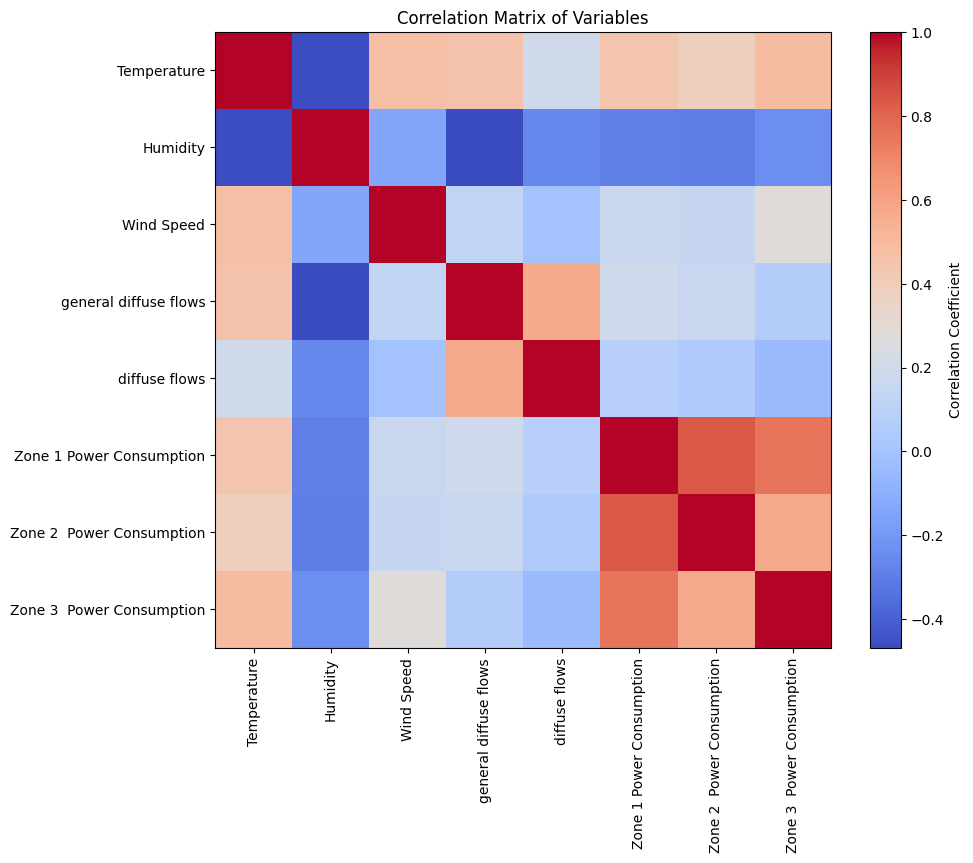

In [ ]:
# Correlation Matrix
correlation = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Matrix of Variables')
plt.show()

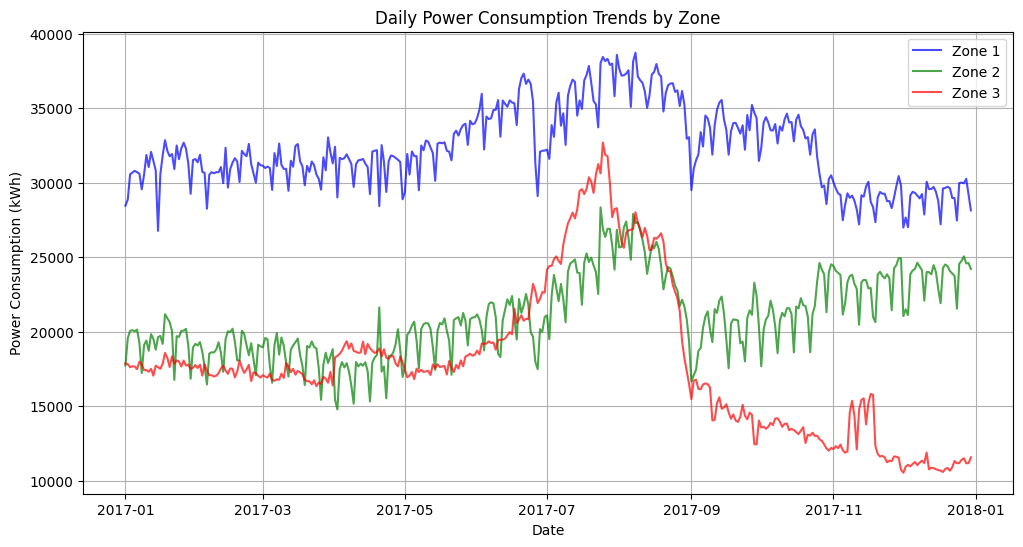

In [ ]:
# Daily Power Consumption Trends by Zone
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Zone 1 Power Consumption'], label='Zone 1', color='blue', alpha=0.7)
plt.plot(daily_data['Zone 2  Power Consumption'], label='Zone 2', color='green', alpha=0.7)
plt.plot(daily_data['Zone 3  Power Consumption'], label='Zone 3', color='red', alpha=0.7)
plt.title('Daily Power Consumption Trends by Zone')
plt.xlabel('Date')
plt.ylabel('Power Consumption (kWh)')
plt.legend()
plt.grid()
plt.show()

<ipython-input-8-bceec912d80b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


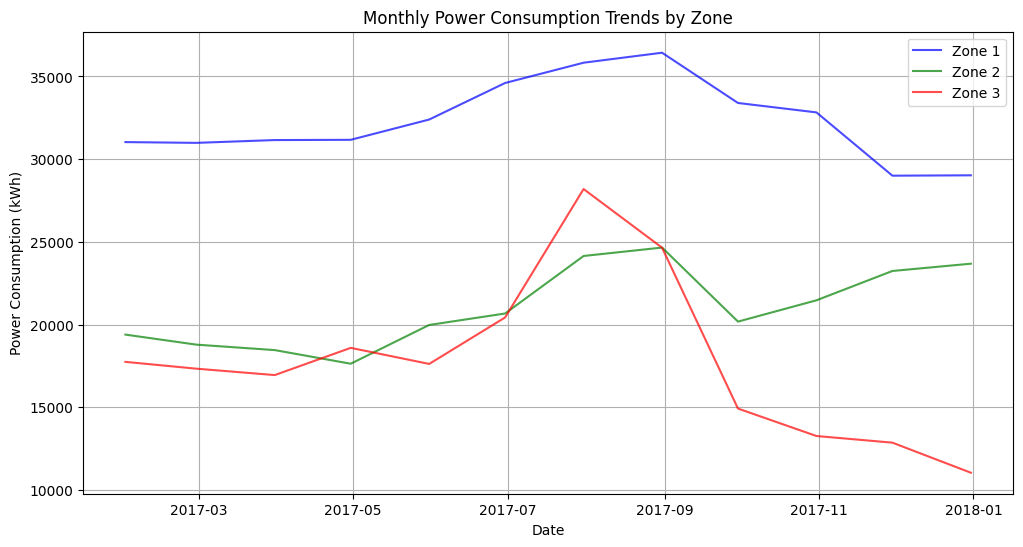

In [ ]:
# Monthly Power Consumption Trends
monthly_data = data.resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Zone 1 Power Consumption'], label='Zone 1', color='blue', alpha=0.7)
plt.plot(monthly_data.index, monthly_data['Zone 2  Power Consumption'], label='Zone 2', color='green', alpha=0.7)
plt.plot(monthly_data.index, monthly_data['Zone 3  Power Consumption'], label='Zone 3', color='red', alpha=0.7)
plt.title('Monthly Power Consumption Trends by Zone')
plt.xlabel('Date')
plt.ylabel('Power Consumption (kWh)')
plt.legend()
plt.grid()
plt.show()

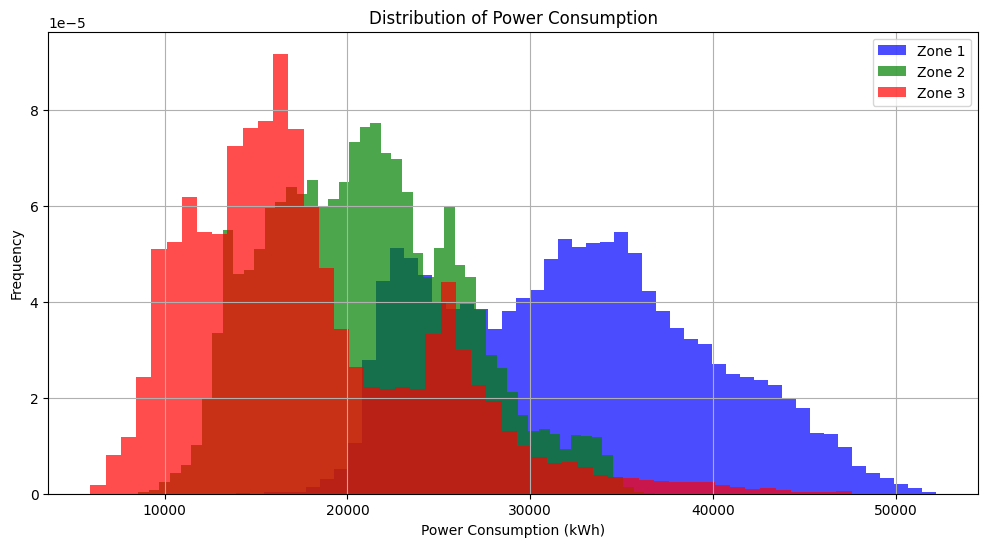

In [ ]:
# Distribution of Power Consumption
plt.figure(figsize=(12, 6))
plt.hist(data['Zone 1 Power Consumption'], bins=50, alpha=0.7, label='Zone 1', color='blue', density=True)
plt.hist(data['Zone 2  Power Consumption'], bins=50, alpha=0.7, label='Zone 2', color='green', density=True)
plt.hist(data['Zone 3  Power Consumption'], bins=50, alpha=0.7, label='Zone 3', color='red', density=True)
plt.title('Distribution of Power Consumption')
plt.xlabel('Power Consumption (kWh)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

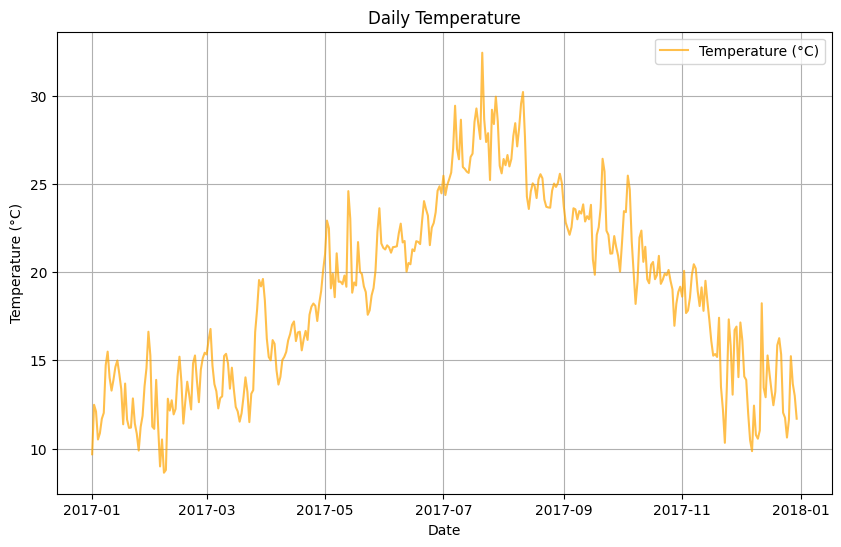

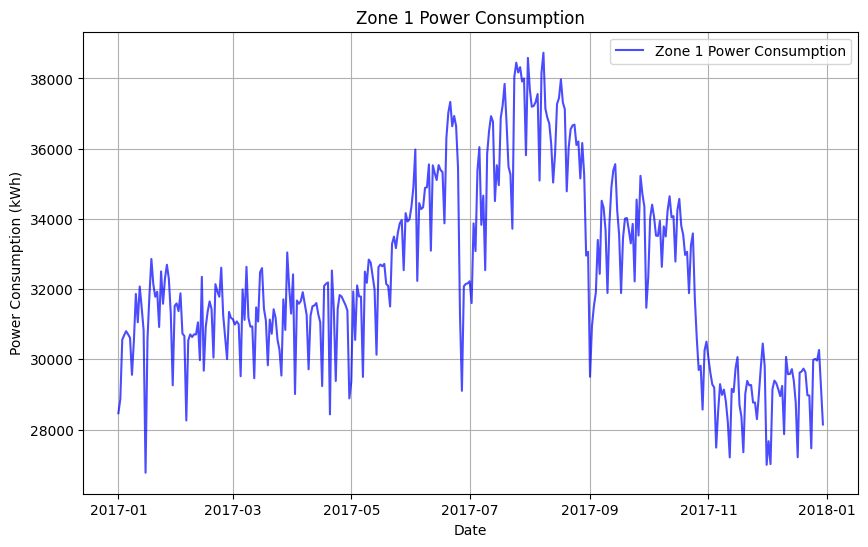

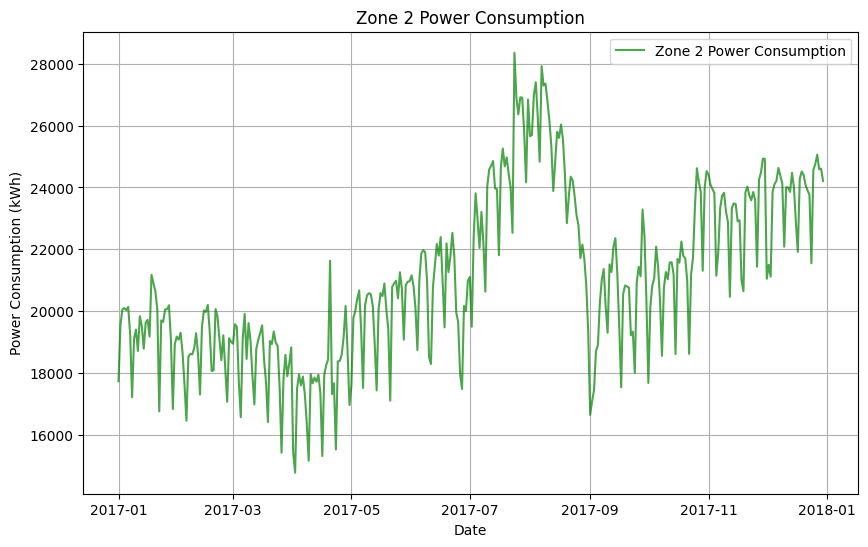

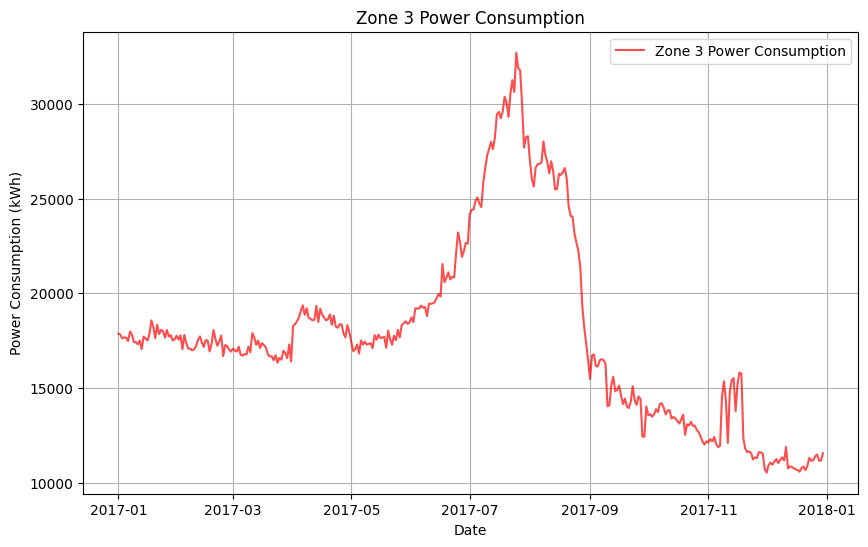

In [ ]:
# Temperature and Power Consumption (Individual Graphs)
plt.figure(figsize=(10, 6))
plt.plot(daily_data['Temperature'], label='Temperature (°C)', color='orange', alpha=0.7)
plt.title('Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_data['Zone 1 Power Consumption'], label='Zone 1 Power Consumption', color='blue', alpha=0.7)
plt.title('Zone 1 Power Consumption')
plt.xlabel('Date')
plt.ylabel('Power Consumption (kWh)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_data['Zone 2  Power Consumption'], label='Zone 2 Power Consumption', color='green', alpha=0.7)
plt.title('Zone 2 Power Consumption')
plt.xlabel('Date')
plt.ylabel('Power Consumption (kWh)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_data['Zone 3  Power Consumption'], label='Zone 3 Power Consumption', color='red', alpha=0.7)
plt.title('Zone 3 Power Consumption')
plt.xlabel('Date')
plt.ylabel('Power Consumption (kWh)')
plt.grid()
plt.legend()
plt.show()



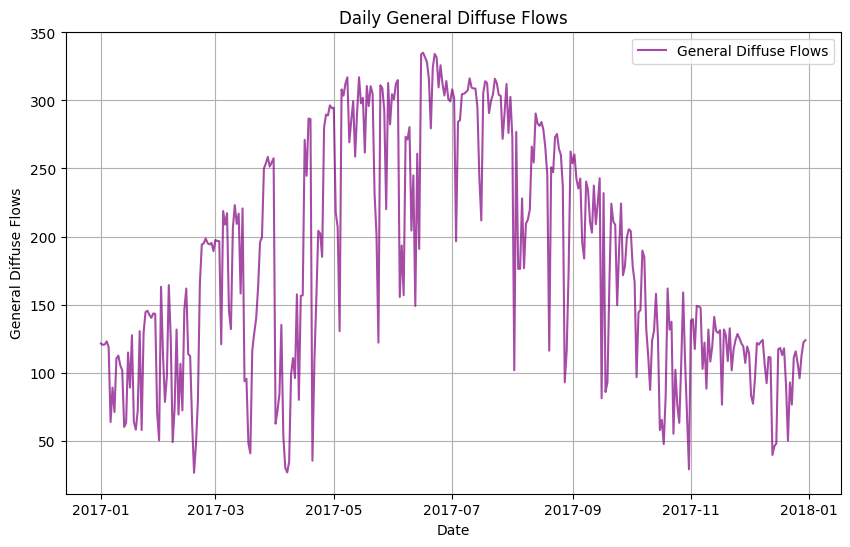

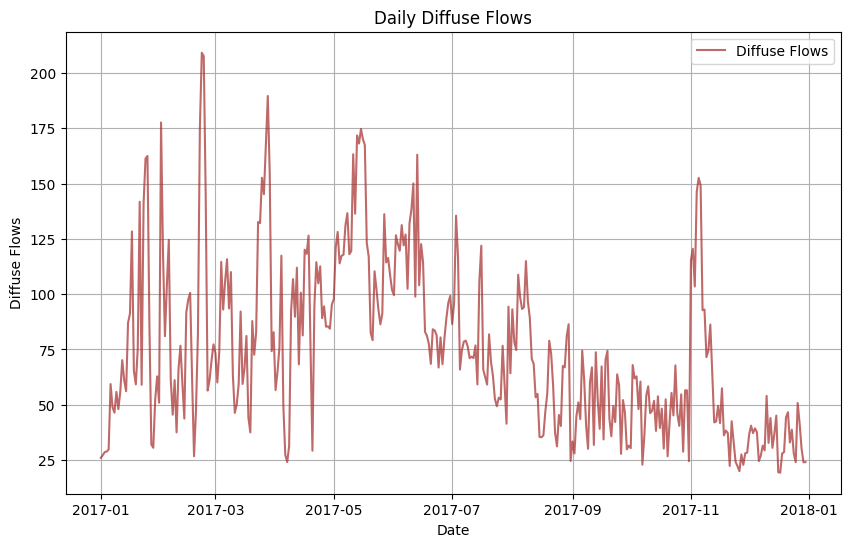

In [ ]:
# General Diffuse Flows vs Power Consumption
plt.figure(figsize=(10, 6))
plt.plot(daily_data['general diffuse flows'], label='General Diffuse Flows', color='purple', alpha=0.7)
plt.title('Daily General Diffuse Flows')
plt.xlabel('Date')
plt.ylabel('General Diffuse Flows')
plt.grid()
plt.legend()
plt.show()

# Diffuse Flows vs Power Consumption
plt.figure(figsize=(10, 6))
plt.plot(daily_data['diffuse flows'], label='Diffuse Flows', color='brown', alpha=0.7)
plt.title('Daily Diffuse Flows')
plt.xlabel('Date')
plt.ylabel('Diffuse Flows')
plt.grid()
plt.legend()
plt.show()

<ipython-input-12-216b08eb9f30>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_means = data.groupby(temperature_bins)['Total Power Consumption'].mean()


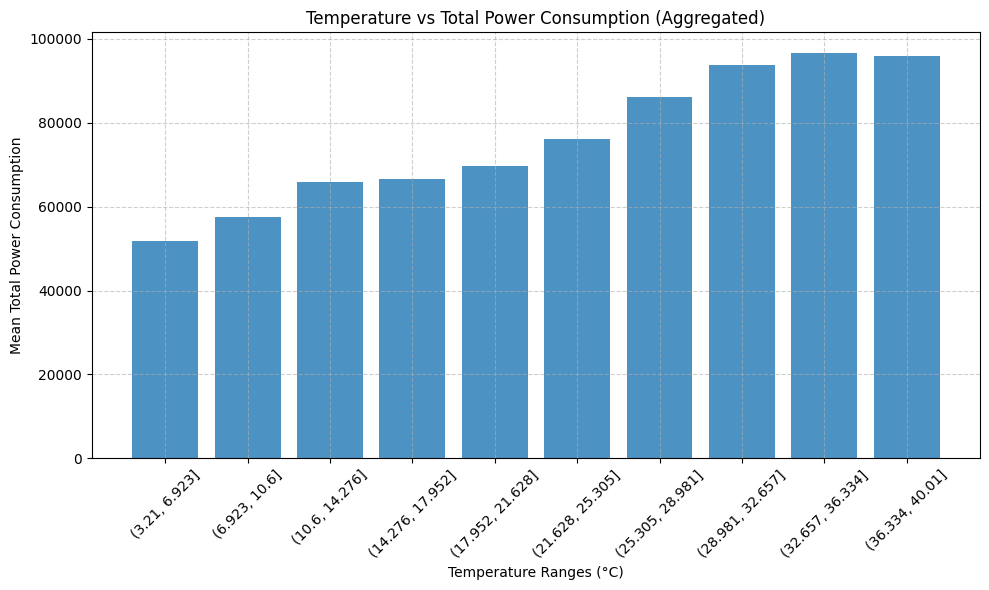

<ipython-input-12-216b08eb9f30>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_means = data.groupby(humidity_bins)['Total Power Consumption'].mean()


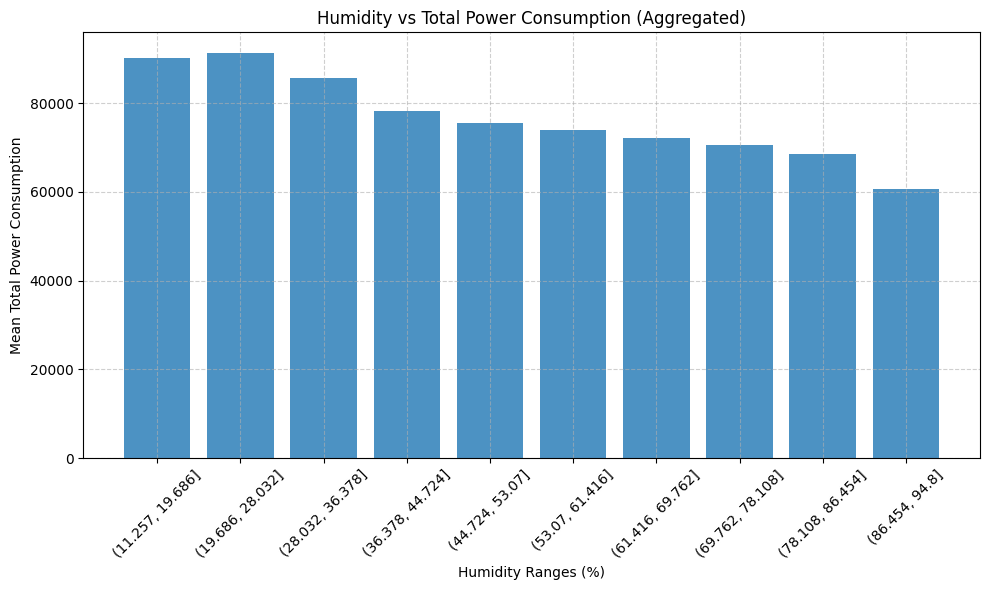

<ipython-input-12-216b08eb9f30>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_means = data.groupby(wind_speed_bins)['Total Power Consumption'].mean()


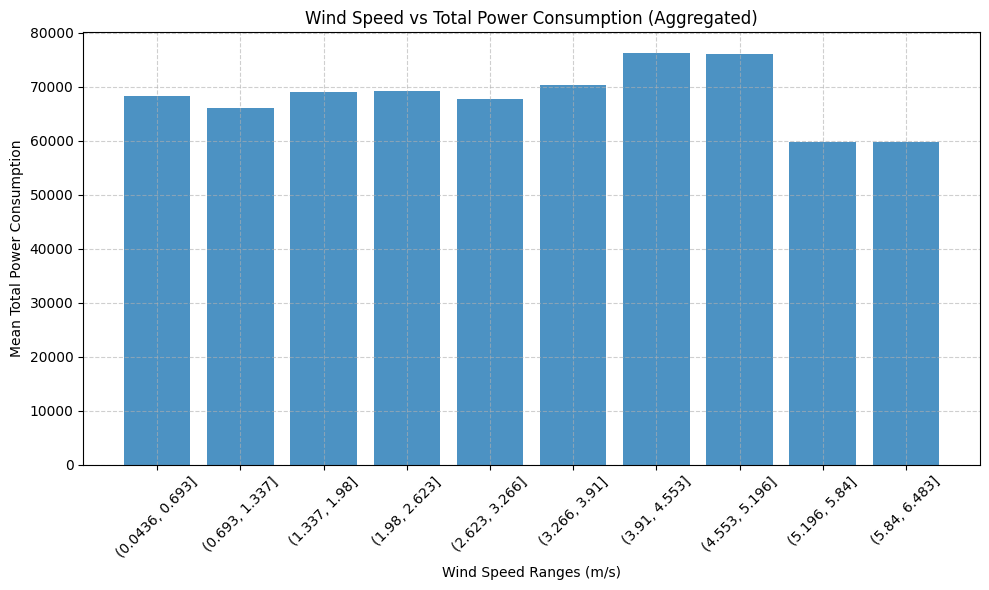

<ipython-input-12-216b08eb9f30>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  general_diffuse_means = data.groupby(general_diffuse_bins)['Total Power Consumption'].mean()


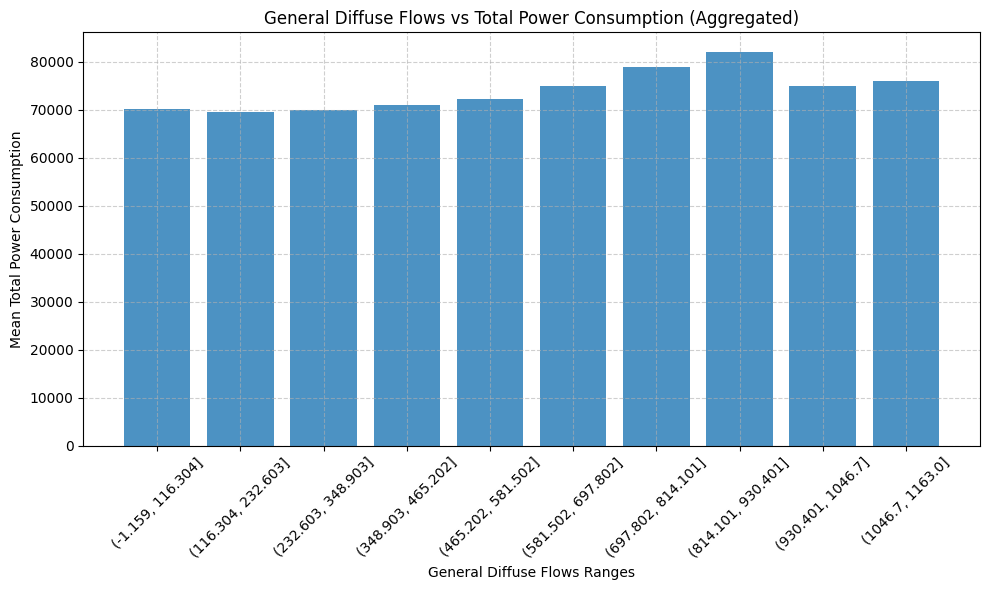

<ipython-input-12-216b08eb9f30>:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diffuse_flows_means = data.groupby(diffuse_flows_bins)['Total Power Consumption'].mean()


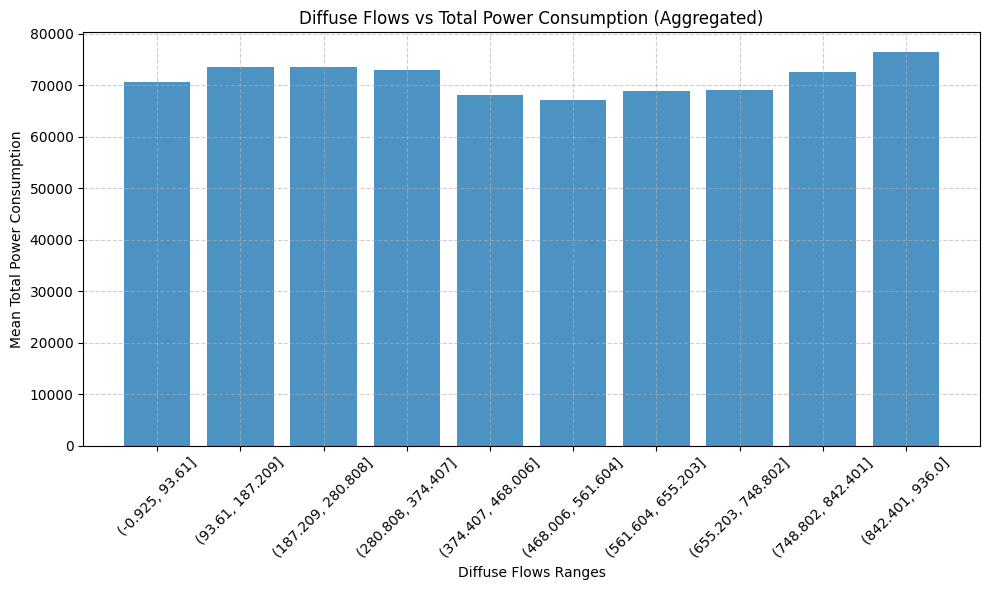

In [ ]:
import matplotlib.pyplot as plt

# Create a new column for the total power consumption across all zones
data['Total Power Consumption'] = (
    data['Zone 1 Power Consumption'] +
    data['Zone 2  Power Consumption'] +
    data['Zone 3  Power Consumption']
)

# Helper function for line plots
def plot_aggregate_correlation(x, y, xlabel, ylabel, title, plot_type='line'):
    plt.figure(figsize=(10, 6))
    if plot_type == 'line':
        plt.plot(x, y, linestyle='-', marker='o', alpha=0.8)
    elif plot_type == 'bar':
        plt.bar(x, y, alpha=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Group by temperature ranges and aggregate power consumption
temperature_bins = pd.cut(data['Temperature'], bins=10)
temperature_means = data.groupby(temperature_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(temperature_means.index.astype(str), temperature_means.values,
                           "Temperature Ranges (°C)", "Mean Total Power Consumption",
                           "Temperature vs Total Power Consumption (Aggregated)", plot_type='bar')

# Group by humidity ranges and aggregate power consumption
humidity_bins = pd.cut(data['Humidity'], bins=10)
humidity_means = data.groupby(humidity_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(humidity_means.index.astype(str), humidity_means.values,
                           "Humidity Ranges (%)", "Mean Total Power Consumption",
                           "Humidity vs Total Power Consumption (Aggregated)", plot_type='bar')

# Group by wind speed ranges and aggregate power consumption
wind_speed_bins = pd.cut(data['Wind Speed'], bins=10)
wind_speed_means = data.groupby(wind_speed_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(wind_speed_means.index.astype(str), wind_speed_means.values,
                           "Wind Speed Ranges (m/s)", "Mean Total Power Consumption",
                           "Wind Speed vs Total Power Consumption (Aggregated)", plot_type='bar')

# Group by general diffuse flows and aggregate power consumption
general_diffuse_bins = pd.cut(data['general diffuse flows'], bins=10)
general_diffuse_means = data.groupby(general_diffuse_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(general_diffuse_means.index.astype(str), general_diffuse_means.values,
                           "General Diffuse Flows Ranges", "Mean Total Power Consumption",
                           "General Diffuse Flows vs Total Power Consumption (Aggregated)", plot_type='bar')

# Group by diffuse flows and aggregate power consumption
diffuse_flows_bins = pd.cut(data['diffuse flows'], bins=10)
diffuse_flows_means = data.groupby(diffuse_flows_bins)['Total Power Consumption'].mean()
plot_aggregate_correlation(diffuse_flows_means.index.astype(str), diffuse_flows_means.values,
                           "Diffuse Flows Ranges", "Mean Total Power Consumption",
                           "Diffuse Flows vs Total Power Consumption (Aggregated)", plot_type='bar')


<ipython-input-13-f8be38d999b1>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_means_zone1 = data.groupby(humidity_bins)['Zone 1 Power Consumption'].mean()
<ipython-input-13-f8be38d999b1>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_means_zone2 = data.groupby(humidity_bins)['Zone 2  Power Consumption'].mean()
<ipython-input-13-f8be38d999b1>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humid

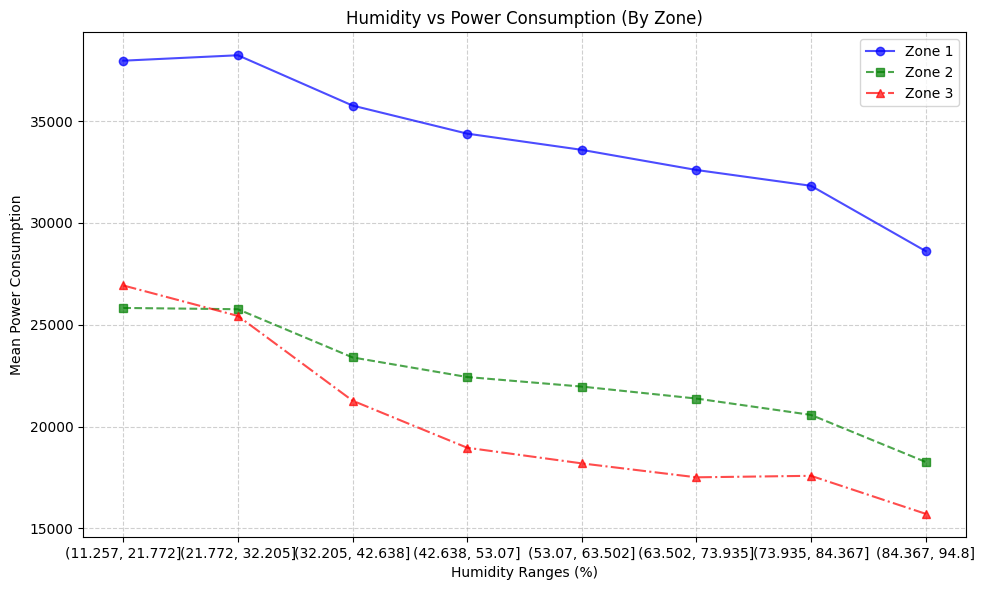

<ipython-input-13-f8be38d999b1>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_means_zone1 = data.groupby(temperature_bins)['Zone 1 Power Consumption'].mean()
<ipython-input-13-f8be38d999b1>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_means_zone2 = data.groupby(temperature_bins)['Zone 2  Power Consumption'].mean()
<ipython-input-13-f8be38d999b1>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

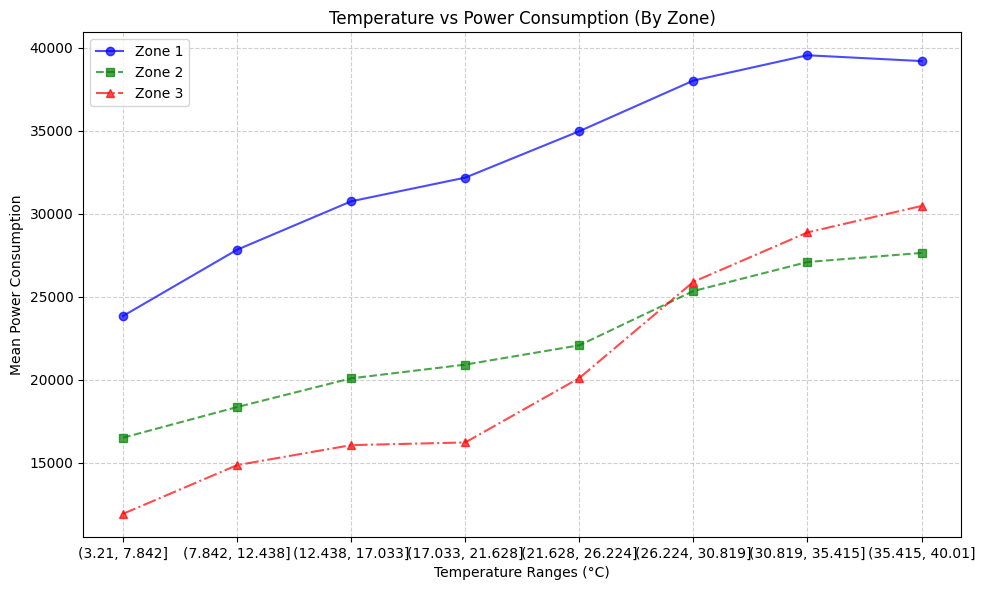

<ipython-input-13-f8be38d999b1>:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_means_zone1 = data.groupby(wind_speed_bins)['Zone 1 Power Consumption'].mean()
<ipython-input-13-f8be38d999b1>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_means_zone2 = data.groupby(wind_speed_bins)['Zone 2  Power Consumption'].mean()
<ipython-input-13-f8be38d999b1>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

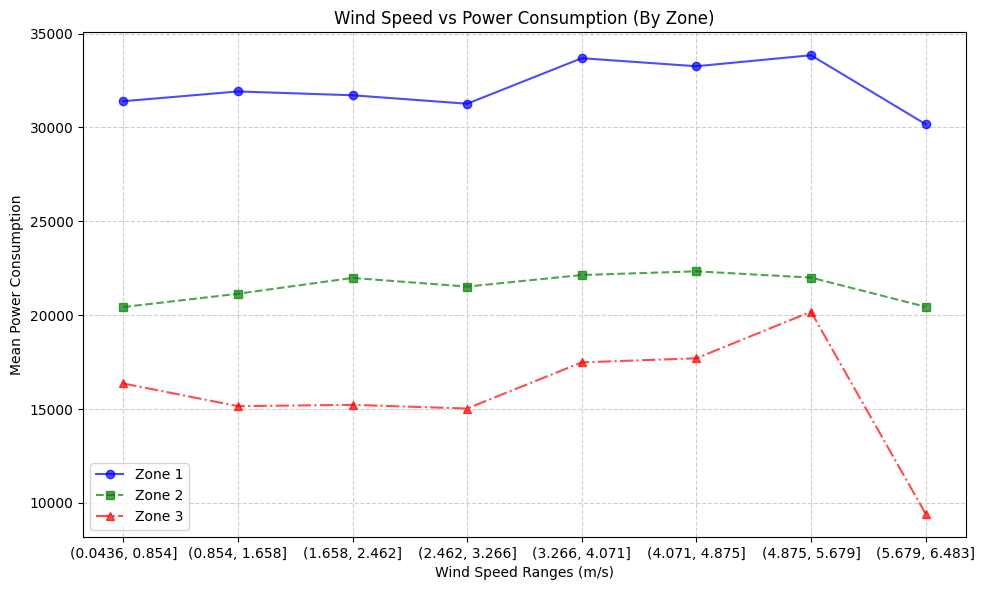

In [ ]:
import matplotlib.pyplot as plt

# Helper function for visualizing correlations with separate colors for each zone
def plot_correlation_multizone(x, y_zone1, y_zone2, y_zone3, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_zone1, label="Zone 1", color='blue', linestyle='-', marker='o', alpha=0.7)
    plt.plot(x, y_zone2, label="Zone 2", color='green', linestyle='--', marker='s', alpha=0.7)
    plt.plot(x, y_zone3, label="Zone 3", color='red', linestyle='-.', marker='^', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Grouping data by humidity ranges
humidity_bins = pd.cut(data['Humidity'], bins=8)
humidity_means_zone1 = data.groupby(humidity_bins)['Zone 1 Power Consumption'].mean()
humidity_means_zone2 = data.groupby(humidity_bins)['Zone 2  Power Consumption'].mean()
humidity_means_zone3 = data.groupby(humidity_bins)['Zone 3  Power Consumption'].mean()

plot_correlation_multizone(humidity_means_zone1.index.astype(str),
                           humidity_means_zone1.values,
                           humidity_means_zone2.values,
                           humidity_means_zone3.values,
                           "Humidity Ranges (%)", "Mean Power Consumption",
                           "Humidity vs Power Consumption (By Zone)")

# Grouping data by temperature ranges
temperature_bins = pd.cut(data['Temperature'], bins=8)
temperature_means_zone1 = data.groupby(temperature_bins)['Zone 1 Power Consumption'].mean()
temperature_means_zone2 = data.groupby(temperature_bins)['Zone 2  Power Consumption'].mean()
temperature_means_zone3 = data.groupby(temperature_bins)['Zone 3  Power Consumption'].mean()

plot_correlation_multizone(temperature_means_zone1.index.astype(str),
                           temperature_means_zone1.values,
                           temperature_means_zone2.values,
                           temperature_means_zone3.values,
                           "Temperature Ranges (°C)", "Mean Power Consumption",
                           "Temperature vs Power Consumption (By Zone)")

# Grouping data by wind speed ranges
wind_speed_bins = pd.cut(data['Wind Speed'], bins=8)
wind_speed_means_zone1 = data.groupby(wind_speed_bins)['Zone 1 Power Consumption'].mean()
wind_speed_means_zone2 = data.groupby(wind_speed_bins)['Zone 2  Power Consumption'].mean()
wind_speed_means_zone3 = data.groupby(wind_speed_bins)['Zone 3  Power Consumption'].mean()

plot_correlation_multizone(wind_speed_means_zone1.index.astype(str),
                           wind_speed_means_zone1.values,
                           wind_speed_means_zone2.values,
                           wind_speed_means_zone3.values,
                           "Wind Speed Ranges (m/s)", "Mean Power Consumption",
                           "Wind Speed vs Power Consumption (By Zone)")


<ipython-input-14-147603c009e5>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  general_diffuse_means_zone1 = data.groupby(general_diffuse_bins)['Zone 1 Power Consumption'].mean()
<ipython-input-14-147603c009e5>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  general_diffuse_means_zone2 = data.groupby(general_diffuse_bins)['Zone 2  Power Consumption'].mean()
<ipython-input-14-147603c009e5>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and s

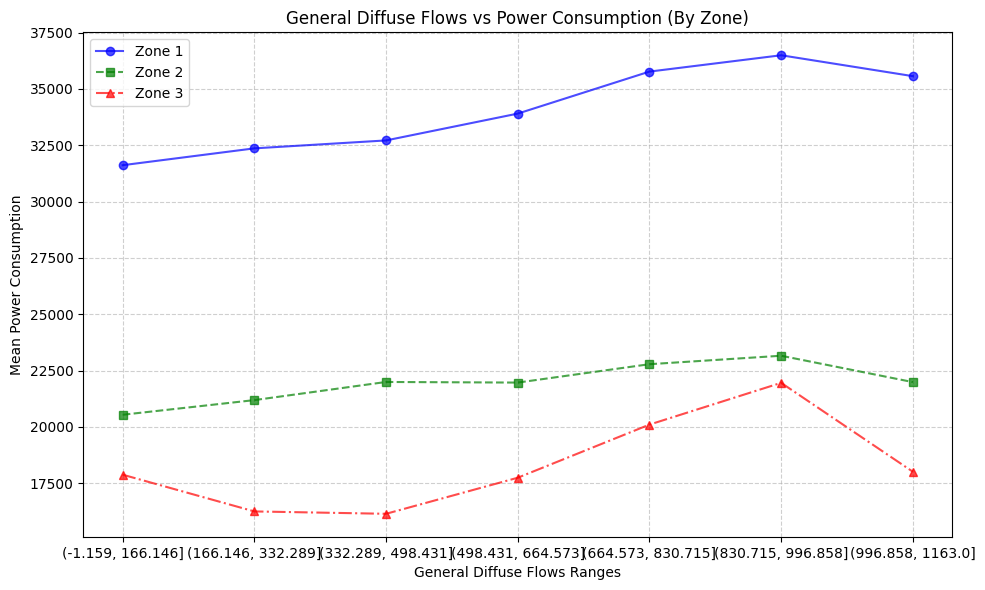

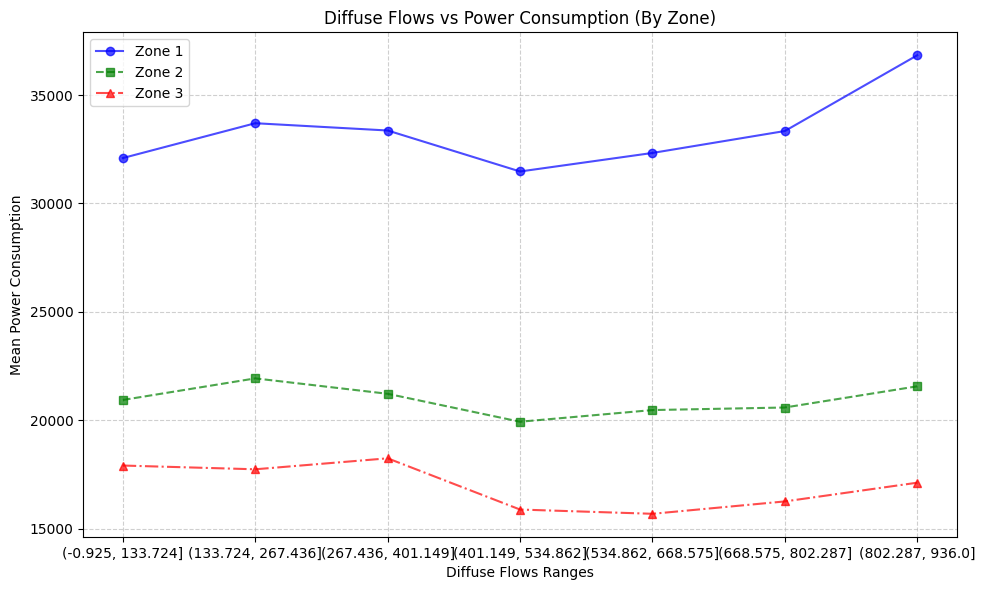

In [ ]:

# Helper function for plotting
def plot_correlation_multizone(x, y_zone1, y_zone2, y_zone3, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_zone1, label="Zone 1", color='blue', linestyle='-', marker='o', alpha=0.7)
    plt.plot(x, y_zone2, label="Zone 2", color='green', linestyle='--', marker='s', alpha=0.7)
    plt.plot(x, y_zone3, label="Zone 3", color='red', linestyle='-.', marker='^', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Create binned data for general diffuse flows and diffuse flows
general_diffuse_bins = pd.cut(data['general diffuse flows'], bins=7)
diffuse_flows_bins = pd.cut(data['diffuse flows'], bins=7)

# Grouping and calculating means
general_diffuse_means_zone1 = data.groupby(general_diffuse_bins)['Zone 1 Power Consumption'].mean()
general_diffuse_means_zone2 = data.groupby(general_diffuse_bins)['Zone 2  Power Consumption'].mean()
general_diffuse_means_zone3 = data.groupby(general_diffuse_bins)['Zone 3  Power Consumption'].mean()

diffuse_flows_means_zone1 = data.groupby(diffuse_flows_bins)['Zone 1 Power Consumption'].mean()
diffuse_flows_means_zone2 = data.groupby(diffuse_flows_bins)['Zone 2  Power Consumption'].mean()
diffuse_flows_means_zone3 = data.groupby(diffuse_flows_bins)['Zone 3  Power Consumption'].mean()

# Plotting General Diffuse Flows vs Power Consumption
plot_correlation_multizone(
    general_diffuse_means_zone1.index.astype(str),
    general_diffuse_means_zone1.values,
    general_diffuse_means_zone2.values,
    general_diffuse_means_zone3.values,
    "General Diffuse Flows Ranges", "Mean Power Consumption",
    "General Diffuse Flows vs Power Consumption (By Zone)"
)

# Plotting Diffuse Flows vs Power Consumption
plot_correlation_multizone(
    diffuse_flows_means_zone1.index.astype(str),
    diffuse_flows_means_zone1.values,
    diffuse_flows_means_zone2.values,
    diffuse_flows_means_zone3.values,
    "Diffuse Flows Ranges", "Mean Power Consumption",
    "Diffuse Flows vs Power Consumption (By Zone)"
)


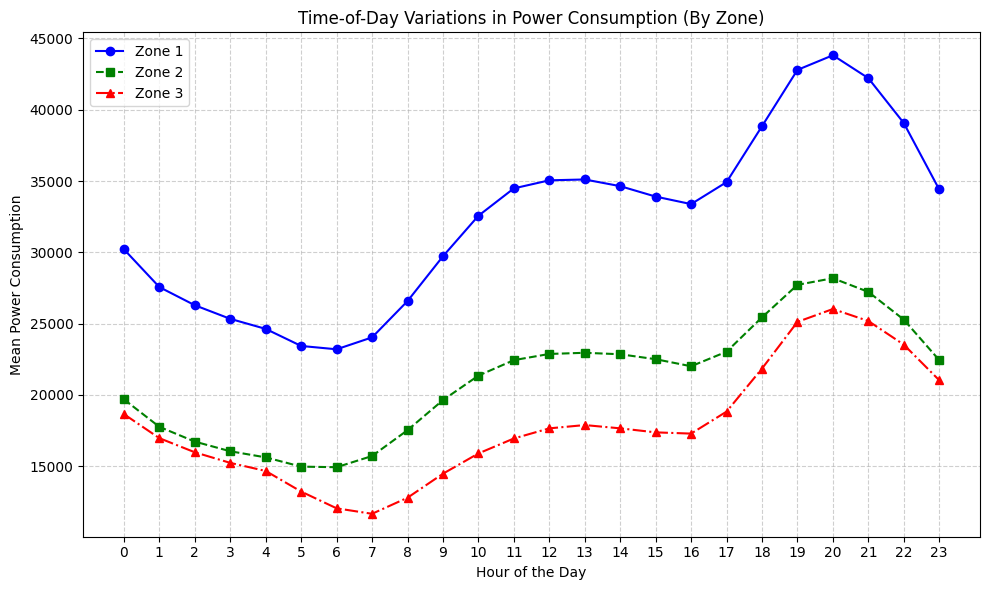

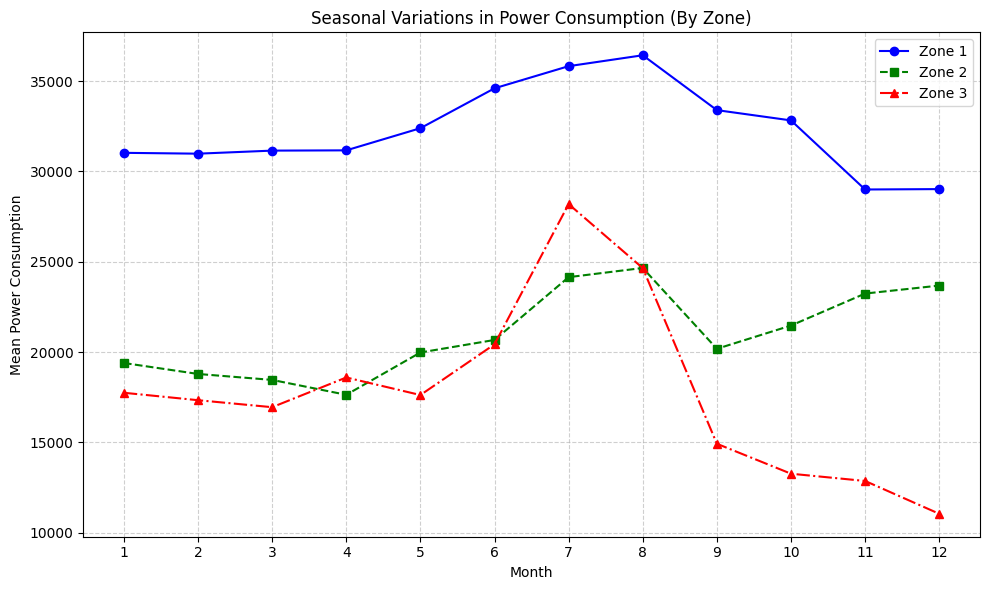

In [ ]:
data['Hour'] = data.index.hour  # Use data.index to access the DateTime index
data['Month'] = data.index.month

# Group by hour to analyze time-of-day variations
hourly_zone1 = data.groupby('Hour')['Zone 1 Power Consumption'].mean()
hourly_zone2 = data.groupby('Hour')['Zone 2  Power Consumption'].mean()
hourly_zone3 = data.groupby('Hour')['Zone 3  Power Consumption'].mean()

# Group by month to analyze seasonal variations
monthly_zone1 = data.groupby('Month')['Zone 1 Power Consumption'].mean()
monthly_zone2 = data.groupby('Month')['Zone 2  Power Consumption'].mean()
monthly_zone3 = data.groupby('Month')['Zone 3  Power Consumption'].mean()

# Plot Time-of-Day Variations
def plot_time_of_day():
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_zone1.index, hourly_zone1.values, label="Zone 1", color='blue', linestyle='-', marker='o')
    plt.plot(hourly_zone2.index, hourly_zone2.values, label="Zone 2", color='green', linestyle='--', marker='s')
    plt.plot(hourly_zone3.index, hourly_zone3.values, label="Zone 3", color='red', linestyle='-.', marker='^')
    plt.title("Time-of-Day Variations in Power Consumption (By Zone)")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Mean Power Consumption")
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot Seasonal Variations
def plot_seasonal_variations():
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_zone1.index, monthly_zone1.values, label="Zone 1", color='blue', linestyle='-', marker='o')
    plt.plot(monthly_zone2.index, monthly_zone2.values, label="Zone 2", color='green', linestyle='--', marker='s')
    plt.plot(monthly_zone3.index, monthly_zone3.values, label="Zone 3", color='red', linestyle='-.', marker='^')
    plt.title("Seasonal Variations in Power Consumption (By Zone)")
    plt.xlabel("Month")
    plt.ylabel("Mean Power Consumption")
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Generate the plots
plot_time_of_day()
plot_seasonal_variations()
